In [2]:
#import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [4]:
import pandas as pd
import numpy as np

In [5]:
data = pd.read_csv(r'heart_data/heart.csv')

In [6]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [7]:
#encode the categorical values
data.RestingECG.unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [8]:
enc_ecg={'Normal':1, 'ST':2,'LVH':3}

In [9]:
enc_ecg

{'Normal': 1, 'ST': 2, 'LVH': 3}

In [10]:
data.RestingECG.map(enc_ecg)

0      1
1      1
2      2
3      1
4      1
      ..
913    1
914    1
915    1
916    3
917    1
Name: RestingECG, Length: 918, dtype: int64

In [11]:
data.RestingECG = data.RestingECG.map(enc_ecg)

In [12]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,1,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,1,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,2,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,1,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,1,122,N,0.0,Up,0


In [13]:
data.ExerciseAngina

0      N
1      N
2      N
3      Y
4      N
      ..
913    N
914    N
915    Y
916    N
917    N
Name: ExerciseAngina, Length: 918, dtype: object

In [14]:
enc_ang={'N':0, 'Y':1}
data.ExerciseAngina.map(enc_ang)

0      0
1      0
2      0
3      1
4      0
      ..
913    0
914    0
915    1
916    0
917    0
Name: ExerciseAngina, Length: 918, dtype: int64

In [15]:
data.ExerciseAngina = data.ExerciseAngina.map(enc_ang)

In [16]:
data.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,1,172,0,0.0,Up,0
1,49,F,NAP,160,180,0,1,156,0,1.0,Flat,1


In [17]:
#encode St-slop
data.ST_Slope.unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [18]:
enc_slope={'Up':0, 'Flat':1,'Down':2}

In [19]:
data.ST_Slope.map(enc_slope)

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: ST_Slope, Length: 918, dtype: int64

In [20]:
data.ST_Slope = data.ST_Slope.map(enc_slope)

In [21]:
data.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,1,172,0,0.0,0,0
1,49,F,NAP,160,180,0,1,156,0,1.0,1,1


In [22]:
#encode 
data.ChestPainType.unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [23]:
enc_chest={'ATA':0, 'NAP':1,'ASY':2,'TA':3}

In [24]:
data.ChestPainType.map(enc_chest)

0      0
1      1
2      0
3      2
4      1
      ..
913    3
914    2
915    2
916    0
917    1
Name: ChestPainType, Length: 918, dtype: int64

In [25]:
data.ChestPainType = data.ChestPainType.map(enc_chest)

In [26]:
data.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,0,140,289,0,1,172,0,0.0,0,0
1,49,F,1,160,180,0,1,156,0,1.0,1,1


In [27]:
#encode 
data.Sex.unique()

array(['M', 'F'], dtype=object)

In [28]:
enc_sex={'M':0, 'F':1}

In [29]:
data.Sex.map(enc_sex)

0      0
1      1
2      0
3      1
4      0
      ..
913    0
914    0
915    0
916    1
917    0
Name: Sex, Length: 918, dtype: int64

In [30]:
data.Sex = data.Sex.map(enc_sex)

In [31]:
data.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0,140,289,0,1,172,0,0.0,0,0
1,49,1,1,160,180,0,1,156,0,1.0,1,1


In [32]:
data.to_csv('data_encoded_kath.csv',index = False)

In [33]:
data = pd.read_csv(r'data_encoded_kath.csv')

In [34]:
data.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0,140,289,0,1,172,0,0.0,0,0
1,49,1,1,160,180,0,1,156,0,1.0,1,1


In [35]:
#tensorflow

In [36]:
# Create model 
model_dict={
    'lr_model': LogisticRegression(),
    'svc_model': SVC(),
    'rf_model': RandomForestClassifier(),
    'dt_model': DecisionTreeClassifier(),
    'knn_model': KNeighborsClassifier()
}

In [37]:
from sklearn.model_selection import train_test_split
X = data.drop('HeartDisease', axis = 1)
y = data.HeartDisease

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [39]:
#import accuracy
from sklearn.metrics import accuracy_score
acc_s = list()

In [40]:
#Train the model
for name, model in model_dict.items():
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    ac=accuracy_score(y_test, y_pred)
    acc_s.append(ac)

e:\Python\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
import matplotlib.pyplot as plt

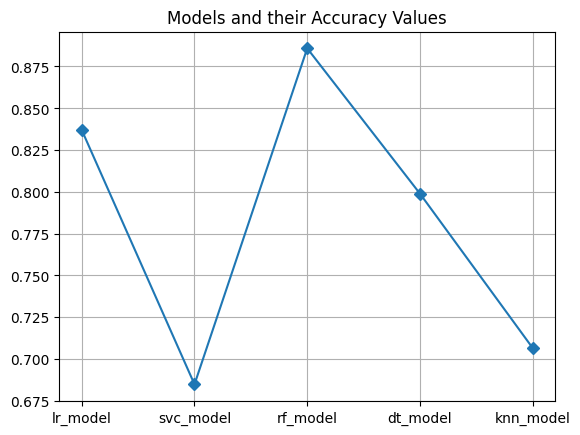

In [45]:
#Plot model and accuracy score
plt.title("Models and their Accuracy Values")
plt.plot(model_dict.keys(),acc_s,marker='D')
plt.grid()


In [46]:
#Since 'svc_modules' gives the best accuracy we will use the 'svc_modules'  
svc_m = SVC()  

In [47]:
svc_m.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [48]:
#Model save
import joblib


In [49]:
joblib.dump(svc_m, 'model_heart.pt')

['model_heart.pt']